In [1]:
from pde.pdes.kuramoto_sivashinsky import KuramotoSivashinskyPDE as KSE
from pde import PDEBase, ScalarField, UnitGrid
import numba as nb
import numpy as np
import numpy.random as rd

from pyESN.pyESN import ESN
from tools import esn_prediction

import matplotlib.pyplot as plt

In [2]:
grid = UnitGrid([20, 20000])
state = ScalarField.random_uniform(grid, seed=85) # generates initial condition
eq = KSE()
result = eq.solve(state, t_range=10, dt=0.01)
# result.plot()

In [3]:
X_in = result.data

In [4]:
params = {'n_reservoir':9000, 
          'sparsity':0.5, 
          'rand_seed':85, 
          'rho':0.4, 
          'noise':0.0001, 
          'future':20, 
          'window':20, 
          'trainlen':9000}

In [5]:
actual = X_in.T[-100:]
predicted = esn_prediction(X_in.T, params)

In [6]:
print(X_in.shape)
print(actual[-100:].shape)
print(predicted.shape)

(20, 20000)
(100, 20)
(20, 20)


In [12]:
actual[-20:].T.shape

(20, 20)

In [15]:
shorter = actual[-20:]
shorter.shape

(20, 20)

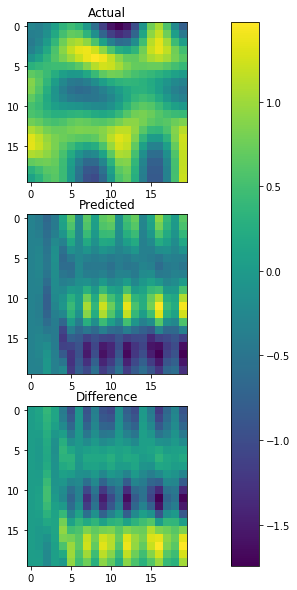

In [17]:
difference = actual[-20:] - predicted
fig, ax = plt.subplots(3,figsize=(16,10))
im = ax[0].imshow(shorter.T)
ax[0].set_title('Actual')
ax[1].imshow(predicted.T)
ax[1].set_title('Predicted')
ax[2].imshow(difference.T)
ax[2].set_title('Difference')
fig.colorbar(im, ax=ax.ravel().tolist())
plt.show()